<a href="https://colab.research.google.com/github/Rachitsingh21/GLOBAL-TERRORISM-data-analysis/blob/main/Project_on_Globle_Terrorism_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

**What is Terrorsim?**

Terrorism is the deliberate killing of innocent people, at random, to spread fear through a whole population and force the hand of its political leaders.
(sorce: https://en.wikipedia.org/wiki/Terrorism)

STEPS CONSIDERED TO SOLVE AND ANALYSE THE DATA:

*   Read and understand the given Raw Data.
*   Import the raw data file from drive to Colab Notebook.
*   Basic Data Cleaning.
*   Test & Problem Assumptions
*   Analysis and Visualization implimentation.






## Lets just get started.

In [ ]:
#Mounting the google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the important packages and Tools. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Loading the given csv file.
labled_path = '/content/drive/MyDrive/Colab Notebooks/ALMA BETTER/CAP STONE PROJECT 1/Global Terrorism Data.csv'

In [ ]:
gt_df = pd.read_csv(labled_path, encoding = 'latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#1.  CLEANING & SELECTION OF DATA

Here we just need to select & extract the data to analyse the given data in a useful manner, so here we slice some of the columns from the raw data. 

In [ ]:
#Renaming of the columns
gt_df.rename(columns = {'iyear':'Year','imonth':'Month','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attacktype','targtype1':'Expected casualities','targtype1_txt':'Targets','targsubtype1':'Total casualities','corp1':'Target personal','natlty1_txt':'Target nationality','gname':'Terror group','motive':'Motive','weaptype1_txt':'Weapon'}, inplace = True)

In [ ]:
gt_df = gt_df[['Year','Month','Country','Region','Attacktype','Expected casualities','Targets','Total casualities','Target personal','Target nationality','Terror group','Motive','Weapon']]

In [ ]:
#Checking the selected Renamed Values presence.
gt_df.columns

Index(['Year', 'Month', 'Country', 'Region', 'Attacktype',
       'Expected casualities', 'Targets', 'Total casualities',
       'Target personal', 'Target nationality', 'Terror group', 'Motive',
       'Weapon'],
      dtype='object')


##2. Exratction & Comparision of Total Casualities Occured:

Here initially we are selecting "Year","Expected Casulaities" & "Total Casualities" from the given set of data.


*  Taking given set of data in order to analyse and compare the Expected Casualities can can occure due to Terror Attacks with Total Casualities occured due to Attacks in respected Years.



In [ ]:
#Extracting of useful data related to above context.
first_data = gt_df[['Year','Expected casualities','Total casualities']]
first_data

,Year,Expected casualities,Total casualities
0,1970,14,68.0
1,1970,7,45.0
2,1970,10,54.0
3,1970,7,46.0
4,1970,7,46.0
...,...,...,...
181686,2017,4,36.0
181687,2017,4,27.0
181688,2017,14,76.0
181689,2017,2,21.0


In [ ]:
#Taking the mean of the value columns('Expected casualities', 'Total casualities' occures word wide) w.r.t Years
avg_casualities = first_data.groupby(["Year"])["Expected casualities","Total casualities"].sum()
avg_casualities

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Expected casualities,Total casualities
Year,,
1970,3816,22565.0
1971,2413,14389.0
1972,4245,24576.0
1973,3537,20151.0
1974,3834,21532.0
1975,5325,28574.0
1976,6038,33906.0
1977,8596,47716.0
1978,8716,50129.0


In [ ]:
avg_casualities.describe()

,Expected casualities,Total casualities
count,47.000000,47.000000
mean,32625.978723,171214.021277
std,34444.862211,171726.355622
min,2413.000000,14389.000000
25%,10968.500000,59268.500000
50%,23857.000000,122196.000000
75%,35342.000000,197067.500000
max,144627.000000,743319.000000


In [ ]:
max_percentage = ((avg_casualities["Total casualities"].max())/(avg_casualities["Total casualities"].sum()))*100
f_max_percentage = "{:.1f}".format(max_percentage)
print(f'The percentage of mean of highest casualities occured w.r.t all data is {f_max_percentage}%')

The percentage of mean of highest casualities occured w.r.t all data is 9.2%


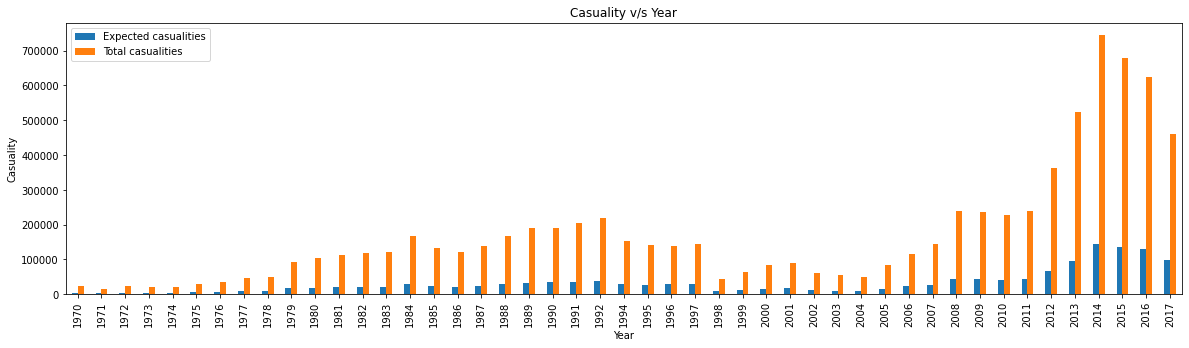

In [ ]:
#ploting of bar graph tp compare the casualities expected v/s occured
avg_casualities.plot.bar(figsize = (20,5),fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Casuality')
plt.title('Casuality v/s Year')
plt.show()

Here from the above graph its is clear that: " The Total occurance of Casualities due to Terror Attack is very hight than that of Expected occurance of Casualities by officials. " Its just about more than 5 times".

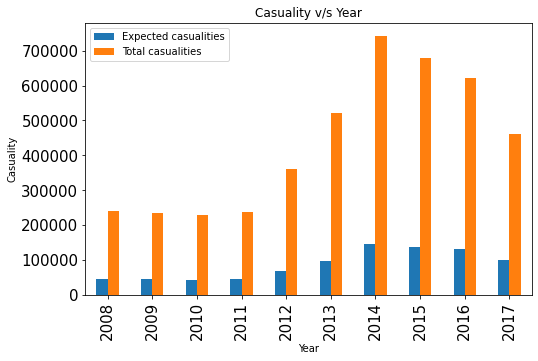

In [ ]:
#Lasr 10 year data
a_c = avg_casualities.tail(10)
a_c.plot.bar(figsize = (8,5),fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Casuality')
plt.title('Casuality v/s Year')
plt.show()

last 10 year data of comparision.

In [ ]:
#sorting of "ean of total casualities" in oreder to find the desasterous year in which highest casuality recorded officially.
avg_casualities.sort_values("Total casualities")

,Expected casualities,Total casualities
Year,,
1971,2413,14389.0
1973,3537,20151.0
1974,3834,21532.0
1970,3816,22565.0
1972,4245,24576.0
1975,5325,28574.0
1976,6038,33906.0
1998,8104,43663.0
1977,8596,47716.0


In [ ]:
#finding the last 10 desasterous years in which there was a highest casuality occurance rate 
avg_tail = avg_casualities.sort_values("Total casualities").tail(10)

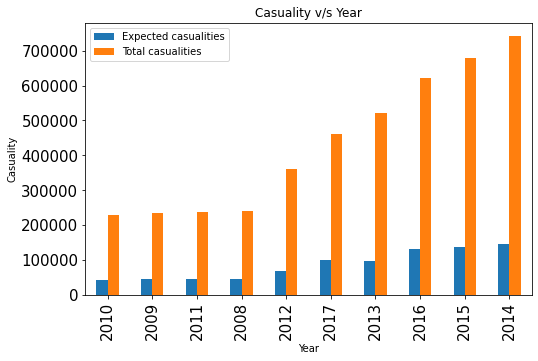

In [ ]:
#plot of graph of above context
avg_tail.plot.bar(figsize = (8,5),fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Casuality')
plt.title('Casuality v/s Year')
plt.show()

Extracting top 10 year data in which mean of death rate is each month is highest than that of others.

In [ ]:
#least casuality 10 occurance years
avg_head = avg_casualities.sort_values("Total casualities").head(10)

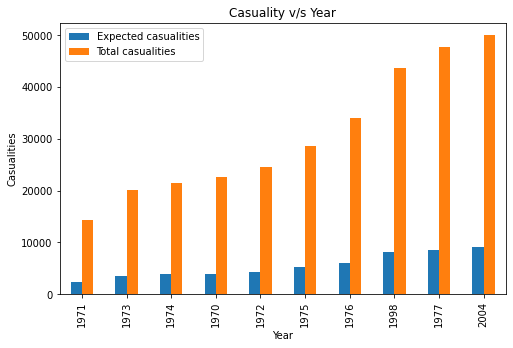

In [ ]:
#ploting of graph of above context
a_h = avg_head.plot.bar(figsize = (8,5),fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Casualities')
plt.title('Casuality v/s Year')
plt.show()

## 3). ATTACK TYPE AND CAUSALITUIES OCCURANCE
The most general task to analyze that which type of weapon is mostly used in case of higher the causalities (death) rate. 

In [ ]:
attack_death = gt_df[["Attacktype","Total casualities"]]
attack_death

,Attacktype,Total casualities
0,Assassination,68.0
1,Hostage Taking (Kidnapping),45.0
2,Assassination,54.0
3,Bombing/Explosion,46.0
4,Facility/Infrastructure Attack,46.0
...,...,...
181686,Armed Assault,36.0
181687,Bombing/Explosion,27.0
181688,Facility/Infrastructure Attack,76.0
181689,Bombing/Explosion,21.0


In [ ]:
a_d = attack_death.groupby(["Attacktype"])["Total casualities"].sum()
a_d

Attacktype
Armed Assault                          1864299.0
Assassination                           790797.0
Bombing/Explosion                      3968813.0
Facility/Infrastructure Attack          438622.0
Hijacking                                31323.0
Hostage Taking (Barricade Incident)      45043.0
Hostage Taking (Kidnapping)             534374.0
Unarmed Assault                          51258.0
Unknown                                 322530.0
Name: Total casualities, dtype: float64

Text(0, 0.5, 'Total no of kills')

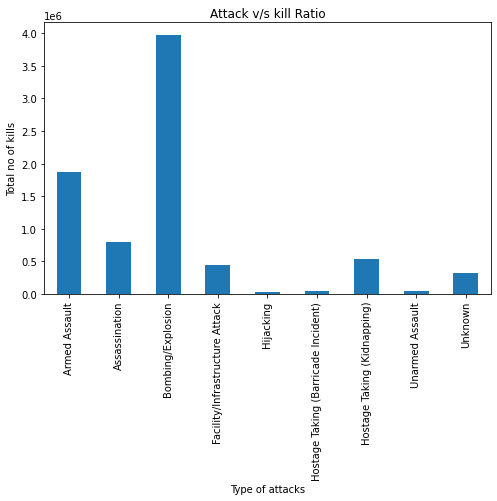

In [ ]:
a_d.plot.bar(figsize = (8,5),fontsize = 10)
plt.title("Attack v/s kill Ratio")
plt.xlabel("Type of attacks")
plt.ylabel("Total no of kills")

## 4. WHICH COUNTRY HAS MOST NO OF CASUALITIES?

Now, we are heading towards, to find the country which is highely affected due to Terror Attacks in pastt few years. We will also goin to find top 10 countries from the data which is highly affected. And will also check total quantities death occured from 1970 to 2017.

In [ ]:
#geatherig of data for anlysing which country has highest casuality occurance rate.
second_data = gt_df[["Country","Total casualities"]]
second_data

,Country,Total casualities
0,Dominican Republic,68.0
1,Mexico,45.0
2,Philippines,54.0
3,Greece,46.0
4,Japan,46.0
...,...,...
181686,Somalia,36.0
181687,Syria,27.0
181688,Philippines,76.0
181689,India,21.0


In [ ]:
#extraction of sum casuality occured w.r.t to specific country 
country_data = second_data.groupby(["Country"])["Total casualities"].sum()
country_data

Country
Afghanistan    478086.0
Albania          2835.0
Algeria        126383.0
Andorra             3.0
Angola          36201.0
                 ...   
Yemen          161018.0
Yugoslavia       7375.0
Zaire            2432.0
Zambia           3806.0
Zimbabwe         5487.0
Name: Total casualities, Length: 205, dtype: float64

Here we have finded the overall occurance of death from each country from 1970-2017.

Text(0.5, 1.0, 'Country v/s Total Casuality occured')

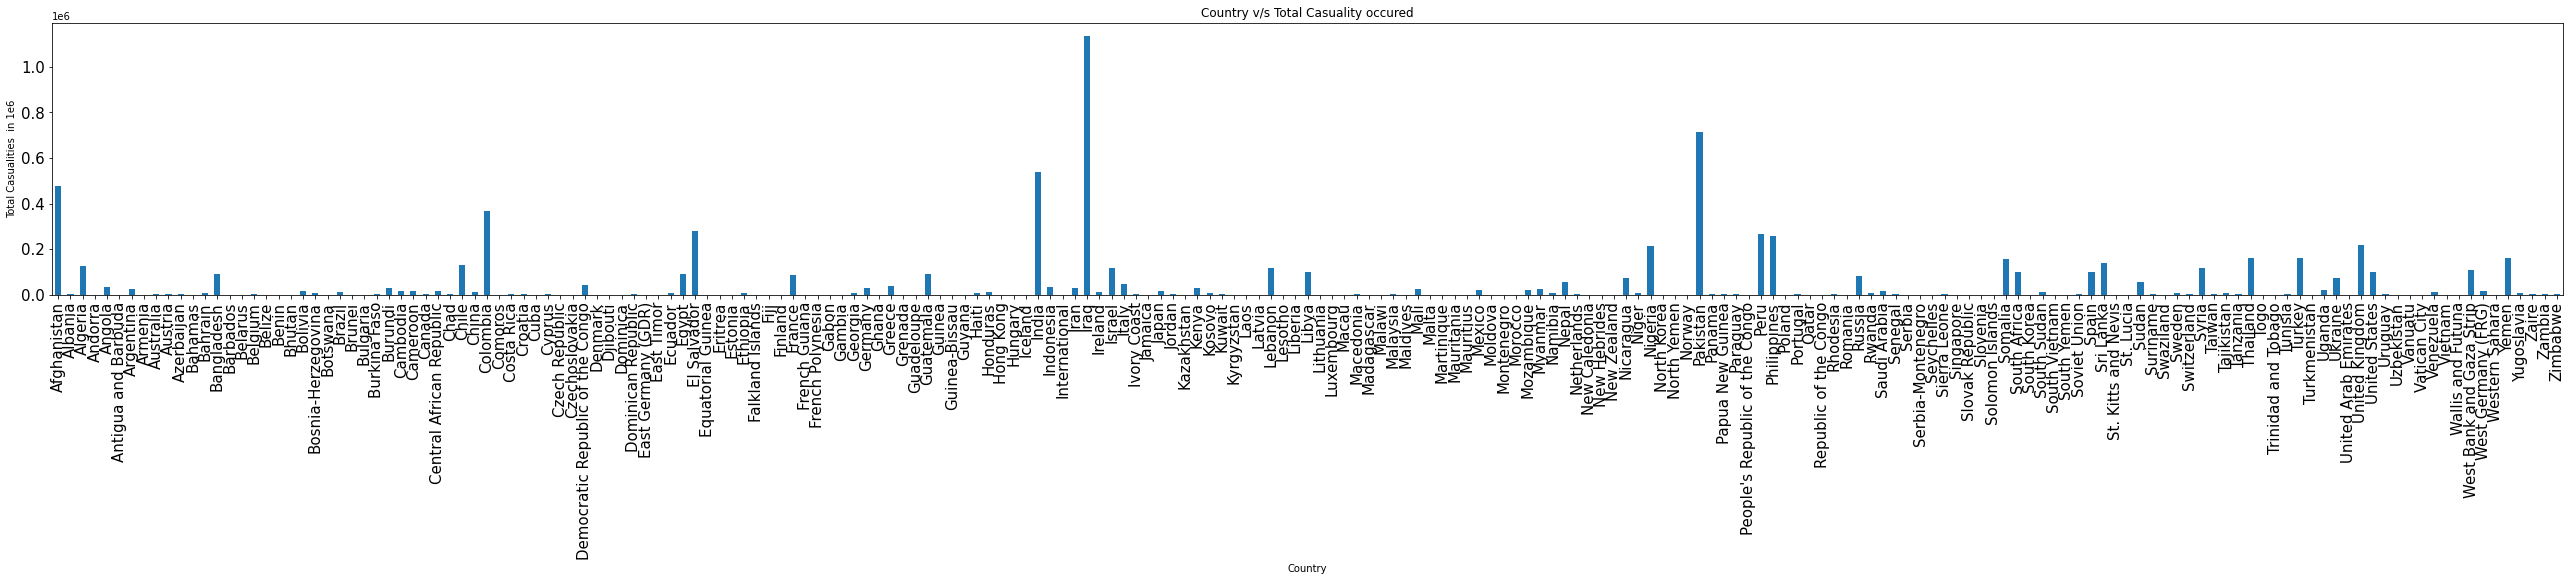

In [ ]:
#overall data of casuality occured in each country since 1970 to 2017
country_data.plot.bar(figsize = (45,5),fontsize = 15)
plt.xlabel("Country")
plt.ylabel("Total Casualities  in 1e6")
plt.title("Country v/s Total Casuality occured")

In [ ]:
#sorting of the above data to covert them in the ascending order
sorted_list = country_data.sort_values()
sorted_list

Country
Andorra                      3.0
Antigua and Barbuda         15.0
North Korea                 15.0
Wallis and Futuna           21.0
Mauritius                   34.0
                         ...    
Colombia                367581.0
Afghanistan             478086.0
India                   540762.0
Pakistan                712996.0
Iraq                   1134748.0
Name: Total casualities, Length: 205, dtype: float64

In [ ]:
#finding the highly volatile country in terms of highest no of casuality occued in the specific country
sorted_list.tail(10)

Country
Nigeria            213151.0
United Kingdom     219171.0
Philippines        259598.0
Peru               266076.0
El Salvador        279345.0
Colombia           367581.0
Afghanistan        478086.0
India              540762.0
Pakistan           712996.0
Iraq              1134748.0
Name: Total casualities, dtype: float64

As obviously if we start to talk abount Terror Attacks so it is impossible to not to talk about casualities(death) occurance rate from each of the country. 

So, here we had extracted the top 10 countries datas in which highest no of occurance of casualities was there in between 1970-2017.

Text(0.5, 1.0, 'Country v/s Total Casuality occured')

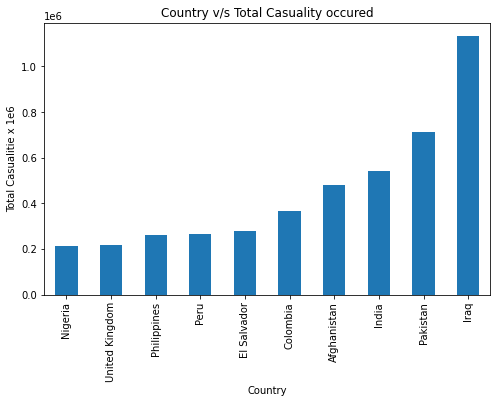

In [ ]:
#printing of the plot from the above extracted data
sorted_list.tail(10).plot.bar(figsize = (8,5),fontsize = 10)
plt.xlabel("Country")
plt.ylabel("Total Casualitie x 1e6")
plt.title("Country v/s Total Casuality occured")

In [ ]:
# finding the statistical forms from teh same data to describe them: fro ex "mean","median"."mode","max","min" etc
f = country_data.describe()
f

count    2.050000e+02
mean     3.925395e+04
std      1.166154e+05
min      3.000000e+00
25%      5.330000e+02
50%      2.789000e+03
75%      1.657000e+04
max      1.134748e+06
Name: Total casualities, dtype: float64

In [ ]:
# Total percentage (%) of casualities occuring in IRAQ againt the casualities occured in whole word
Iraq_casualities = (f.max()/8047059)*100
f_Iraq_casualities = "{:.1f}".format(Iraq_casualities)
print(f'The percentage of casualities occused in IRAQ w.r.t all WORLD is {f_Iraq_casualities}%')

The percentage of casualities occused in IRAQ w.r.t all WORLD is 14.1%


As from above graph we have observed that occurance of casualities in "IRAQ" is the highest then that of other country. Which is all about 14.10 % of casualities occurance among of the world.

In [ ]:
# finding the least volitile country in terms of Terrorist Attack and casualities occurance
least_casuality_country = sorted_list.head(10)
least_casuality_country

Country
Andorra                 3.0
Antigua and Barbuda    15.0
North Korea            15.0
Wallis and Futuna      21.0
Mauritius              34.0
Vanuatu                35.0
South Vietnam          42.0
Turkmenistan           46.0
New Hebrides           54.0
Falkland Islands       58.0
Name: Total casualities, dtype: float64

Text(0.5, 1.0, 'Country v/s Total Casuality occured')

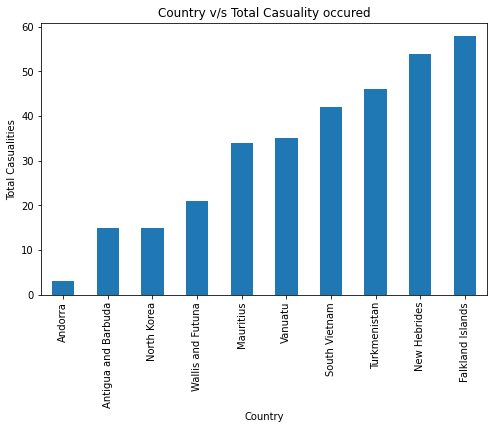

In [ ]:
#ploting the graph from the above data and finding the least volatile country in terms of casuality
least_casuality_country.plot.bar(figsize = (8,5),fontsize = 10)
plt.xlabel("Country")
plt.ylabel("Total Casualities")
plt.title("Country v/s Total Casuality occured")

## Types of Attacks conducted by Terror groups & the weapons which is mostly being used in the Terror Attacks.

If we are talking about Terror Attacks so it is really very general to have a question like which kind of attacks is been conducted by the different terror groups & which kind of weapon has mostly been used to conduct a Terror Attack.

##5) **Most common Attack types used by Terrorists**

In [ ]:
#Finding the Type of Terror Attacks which is mostly being conducted by the Terror Groups.
attack = gt_df[["Attacktype"]]
attack


,Attacktype
0,Assassination
1,Hostage Taking (Kidnapping)
2,Assassination
3,Bombing/Explosion
4,Facility/Infrastructure Attack
...,...
181686,Armed Assault
181687,Bombing/Explosion
181688,Facility/Infrastructure Attack
181689,Bombing/Explosion


In [ ]:
#counting of highest no of times a perticular attack type conducted by Terrorists
attack_type_data = attack["Attacktype"].value_counts()
attack_type_data

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

Text(0.5, 1.0, 'No of times Attacks conducted')

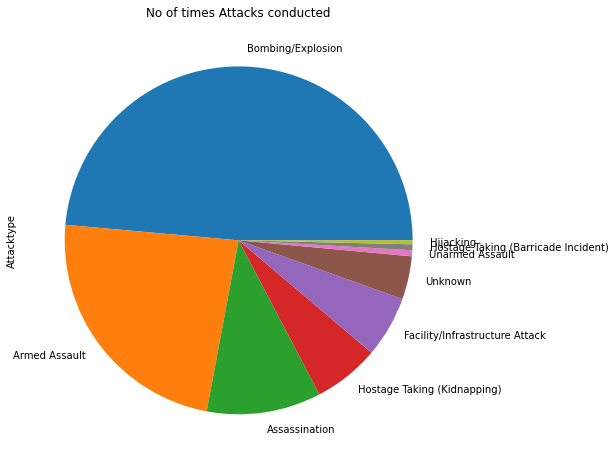

In [ ]:
#ploting the graph of no of times a perticular attack type conducted by Terrorists.
attack_type_data.plot.pie(figsize = (8,8),fontsize = 10)
plt.title("No of times Attacks conducted")

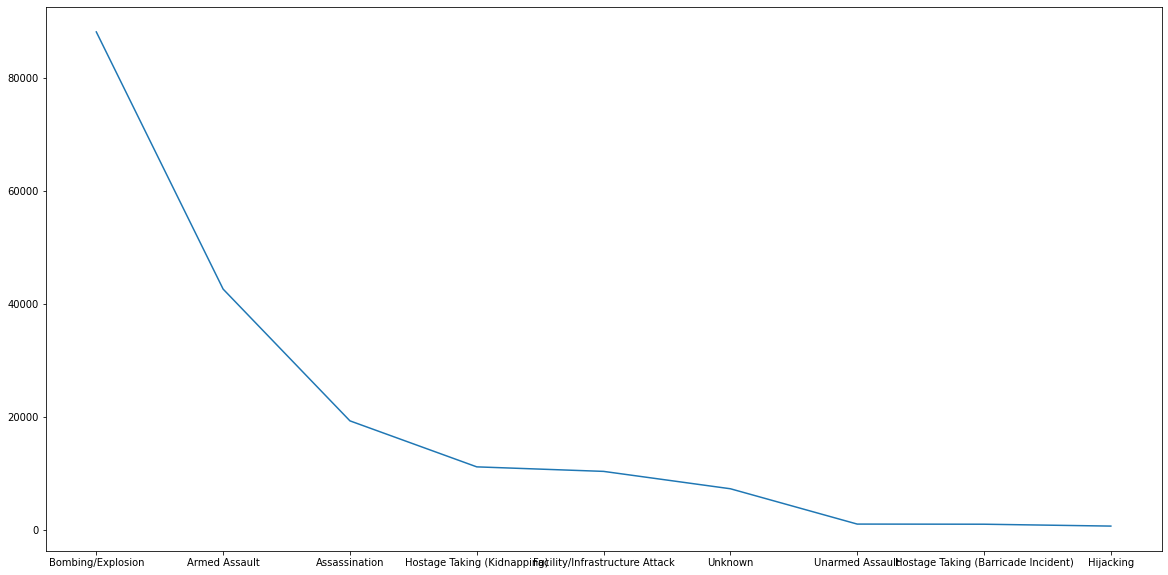

In [ ]:
attack_type_data.plot(figsize = (20,10),fontsize = 10)

As from the above Pie-Chart it is clear that the "Explosion"/"Bombing" type of attackes has be mostly being conducted by the Terrorists.

It is just only beacause of the are "easily portable, assemble and dis-assemble, highly explosive and cause a lot of casualities".

##6). **Mostly used Weapons in Attacks**

In [ ]:
#finding the type of weapon used in terror attacks
weapon_data = gt_df[["Weapon"]]
weapon_data

,Weapon
0,Unknown
1,Unknown
2,Unknown
3,Explosives
4,Incendiary
...,...
181686,Firearms
181687,Explosives
181688,Incendiary
181689,Explosives


In [ ]:
#Counting of how many times the perticular type of weapons ahs been used from 1970 to 2017
weapon_type_used = weapon_data["Weapon"].value_counts()
weapon_type_used

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

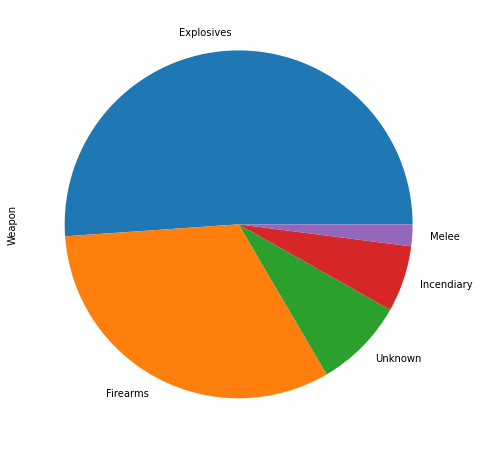

In [ ]:
#ploting the graph of above context with top 5 weapons used to attack
weapon_type_used.head().plot.pie(figsize = (8,8), fontsize = 10)

## 7. No of Peoples got killed by a Perticular type of Weapon.
Here at this stage we are going to extract values by which kind of weapon the highest no of kills has been occured.

In [ ]:
W_data = gt_df[["Weapon","Total casualities"]]

In [ ]:
w_d_u = W_data.groupby(["Weapon"])["Total casualities"].sum().sort_values()
w_d_u

Weapon
Radiological                                                                       442.0
Biological                                                                        1162.0
Fake Weapons                                                                      1349.0
Other                                                                             5943.0
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       6001.0
Sabotage Equipment                                                               11269.0
Chemical                                                                         15492.0
Melee                                                                           202030.0
Incendiary                                                                      508098.0
Unknown                                                                         680330.0
Firearms                                                                       2497408.0
Explosives    

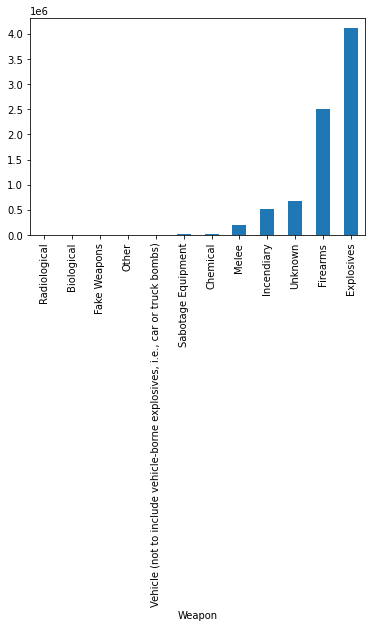

In [ ]:
w_d_u.plot.bar()

##8.  Most of the Attackes are Conducted By which Group?

In order to find the ways to tackle with the most active and dangerous groups due to which people get into fear and use to live with that fear. Because nobody knows like when and how the terror attacks will we conducted by these Terrorist Groups.


In [ ]:
#finding the terrorist groups
group = gt_df[["Terror group"]]
group

,Terror group
0,MANO-D
1,23rd of September Communist League
2,Unknown
3,Unknown
4,Unknown
...,...
181686,Al-Shabaab
181687,Muslim extremists
181688,Bangsamoro Islamic Freedom Movement (BIFM)
181689,Unknown


In [ ]:
#now here we are finding the group, which conducted the highest no of terrorist attacks
z = group["Terror group"].value_counts()
z.head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Terror group, dtype: int64

Text(0.5, 1.0, 'Terror group v/s No of times attack conducted')

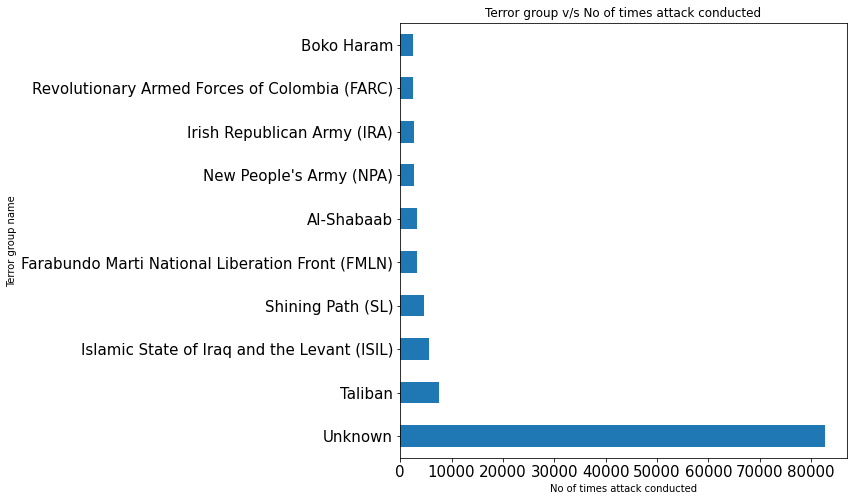

In [ ]:
#ploting the graph of highly active group or the group invoveled in highest no of terrorist attacks
z.head(10).plot.barh(figsize = (8,8), fontsize = 15)
plt.ylabel("Terror group name")
plt.xlabel("No of times attack conducted")
plt.title("Terror group v/s No of times attack conducted")

As of above graph we can easliy conclude that most of of the attackes is conducted by some of the  ANONYMOUS Terror Gropus who dont clames the responsibilties of the attacks or don't want to get highlighted in public.

But it is also clear that "TALIBAN" is on the 2nd highest Terror Attacks conducting groups in all over the world, so everyone should try to make counter strategy to teckle with them.


## Last year most active groups conducted attacks.

To make a counter on these terrorist groups, need to analyse whhich group is mostly active in the recent time or year.

In [ ]:
#year wise data of active terrorist group active in perticalr year
high_active = gt_df[["Year","Terror group"]]

In [ ]:
#grouping by years
h = high_active.groupby(["Year"])["Terror group"].value_counts()
h

Year  Terror group                                
1970  Unknown                                         115
      Left-Wing Militants                             108
      Black Nationalists                               69
      Student Radicals                                 54
      Tupamaros (Uruguay)                              33
                                                     ... 
2017  United Achik National Front (UANF)                1
      United Baloch Army (UBA)                          1
      United Party for National Development (UPND)      1
      United Tribal Liberation Army (UTLA)              1
      Zagros Eagles                                     1
Name: Terror group, Length: 9038, dtype: int64

In [ ]:
#finding the last year using boolean indexing
gt_df["Year"] == 2017

0         False
1         False
2         False
3         False
4         False
          ...  
181686     True
181687     True
181688     True
181689     True
181690     True
Name: Year, Length: 181691, dtype: bool

In [ ]:
last_year_data = gt_df[gt_df["Year"] == 2017]

In [ ]:
#finding the highly active terror group in last year(2017)
high_active = last_year_data[["Year","Terror group"]]

In [ ]:
#conduction of no of attacks by a specific terror group in last year(2017)
h = high_active.groupby(["Year"])["Terror group"].value_counts()
h

Year  Terror group                                
2017  Unknown                                         4349
      Islamic State of Iraq and the Levant (ISIL)     1315
      Taliban                                          894
      Al-Shabaab                                       570
      New People's Army (NPA)                          358
                                                      ... 
      United Achik National Front (UANF)                 1
      United Baloch Army (UBA)                           1
      United Party for National Development (UPND)       1
      United Tribal Liberation Army (UTLA)               1
      Zagros Eagles                                      1
Name: Terror group, Length: 338, dtype: int64

In [ ]:
h.head(10)

Year  Terror group                               
2017  Unknown                                        4349
      Islamic State of Iraq and the Levant (ISIL)    1315
      Taliban                                         894
      Al-Shabaab                                      570
      New People's Army (NPA)                         358
      Boko Haram                                      333
      Maoists                                         206
      Khorasan Chapter of the Islamic State           175
      Houthi extremists (Ansar Allah)                 158
      Kurdistan Workers' Party (PKK)                  156
Name: Terror group, dtype: int64

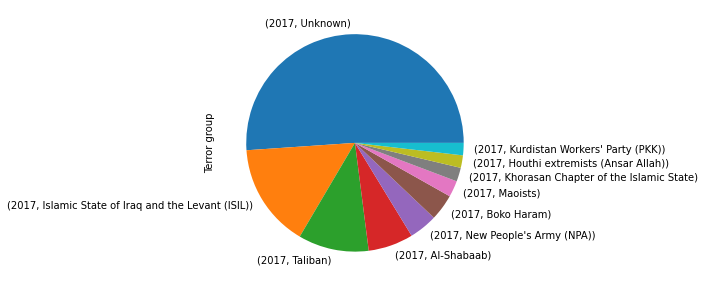

In [ ]:
#quenching the top 10 terror organisation which is engaged in highest no of terror attacks in last year(2017)
h.head(10).plot.pie(figsize = (10,5), fontsize = 10)

As we already know that the "TALIBAN" is the most highly active group in order to conduct most no of attacks in past few year but in last year, 2017 "Islamic State of Iraq and the Levant (ISIL)" conducted the highest no of terrorist attacks all over the world. Which is about 1315.

In [ ]:
h.tail(10)

Year  Terror group                                                       
2017  The Owners of the White Flags                                          1
      Tutsi extremists                                                       1
      Uighur Separatists                                                     1
      Unified Communist Party of Nepal (Maoist)                              1
      Union of Peoples and Organizations of the State of Guerrero (UPOEG)    1
      United Achik National Front (UANF)                                     1
      United Baloch Army (UBA)                                               1
      United Party for National Development (UPND)                           1
      United Tribal Liberation Army (UTLA)                                   1
      Zagros Eagles                                                          1
Name: Terror group, dtype: int64

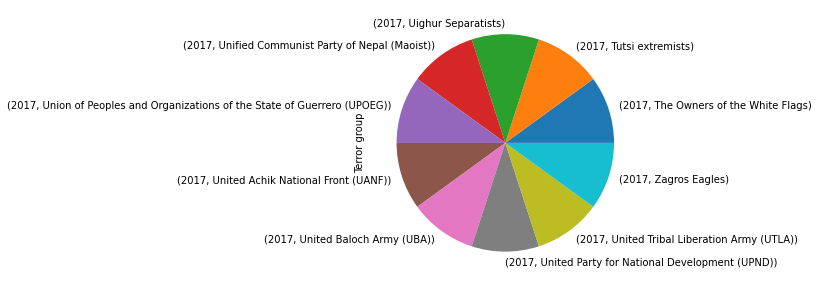

In [ ]:
##quenching the top 10 terror organisation which is engaged in lowest no of terror attacks in last year(2017)
h.tail(10).plot.pie(figsize = (10,5), fontsize = 10)

## **Conclusion:**

Thats all for our analysing of the data in order to considering the "year","expected casualities","total casualities", "attacktype", "weapon", & "Terror groups" involved in the major Terrorist Activities in past few years. Here we had deal with the missing of some useful kind of data, we finded them and we have also tested some fundamental statistical assumptions and transformations in order to analyse the data in basic and useful manner.

That's a lot of work that Python helped us make easier.
